<a href="https://colab.research.google.com/github/luisdem01/Quimica_general/blob/main/PC2_Quimica_General.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PC N°2: Materia y clasificación

Alumno: De la Cruz Meza Angel Luis Kallpa

## Pregunta 1: DataFrames y listas en python

In [ ]:
!pip install rdkit

In [ ]:
from rdkit import Chem
PeriodicTable = Chem.GetPeriodicTable()

In [ ]:
from rdkit import Chem
PeriodicTable = Chem.GetPeriodicTable()

simbolos = []
for i in range(1,21):
  simbolos.append(PeriodicTable.GetElementSymbol(i))

nombres = [PeriodicTable.GetElementName(x) for x in range(1,21)]
masas_atomicas = [PeriodicTable.GetAtomicWeight(x) for x in simbolos]
numeros_atomicos = [PeriodicTable.GetAtomicNumber(x) for x in simbolos]
valencias = [PeriodicTable.GetDefaultValence(x) for x in range(1,21)]

import pandas as pd
data = {'nombre':nombres, 'simbolo':simbolos, 'masa_atomica':masas_atomicas, 'numero_atomico':numeros_atomicos, 'valencia':valencias}
df = pd.DataFrame(data)
df

,nombre,simbolo,masa_atomica,numero_atomico,valencia
0,Hydrogen,H,1.008,1,1
1,Helium,He,4.003,2,0
2,Lithium,Li,6.941,3,1
3,Beryllium,Be,9.012,4,2
4,Boron,B,10.812,5,3
5,Carbon,C,12.011,6,4
6,Nitrogen,N,14.007,7,3
7,Oxygen,O,15.999,8,2
8,Fluorine,F,18.998,9,1
9,Neon,Ne,20.180,10,0


## Pregunta 2: Configuración electrónica

In [ ]:
from rdkit import Chem
PeriodcTable = Chem.GetPeriodicTable()

import numpy as np
e = np.arange(1,119)

def f(p):
  if p in [1,2]:
    return e[p-1]
  elif p in range(3,11):
    return e[p-1]-2
  elif p in range(11,19):
    return e[p-1]-10
  elif p in range(19,21):
    return e[p-1]-18
  elif p in range(21,31) or p in range(39,49) or p in range(57,81) or p in range(89,113):
    return e[1]
  elif p in range(31,37):
    return e[p-1]-28
  elif p in range(37,39):
    return e[p-1]-36
  elif p in range(49,55):
    return e[p-1]-46
  elif p in range(55,57):
    return e[p-1]-54
  elif p in range(81,87):
    return e[p-1]-78
  elif p in range(87,89):
    return e[p-1]-86
  elif p in range(113,119):
    return e[p-1]-110

p = int(input("Ingresa el número de protones: "))

if p in range(1,119):
  print(f"Elemento: {PeriodicTable.GetElementName(p)}")
  print(f"Electrones de valencia: {f(p)}")
else:
  print("Numero invalido")

Ingresa el número de protones: 27
Elemento: Cobalt
Electrones de valencia: 2


## Pregunta 3: Molecularidad & compuestos covalentes

In [ ]:
!pip install chempy

In [ ]:
from chempy import balance_stoichiometry
from chempy import Substance

C4H8 = Substance.from_formula('C4H8')
O2 = Substance.from_formula('O2')
CO2 = Substance.from_formula('CO2')
OH2 = Substance.from_formula('OH2')

print("Ecuacion original:")
print("C4H8 + O2 -> CO2 + OH2")

reactantes, productos = balance_stoichiometry({'C4H8','O2'},{'CO2','OH2'})

print()
print("Ecuacion balanceada:")
print(f"{reactantes['C4H8']} C6H12O6 + {reactantes['O2']} O2 -> {productos['CO2']} CO2 + {productos['OH2']} OH2")

Ecuacion original:
C4H8 + O2 -> CO2 + OH2

Ecuacion balanceada:
1 C6H12O6 + 6 O2 -> 4 CO2 + 4 OH2


## Pregunta 4: SMILES, RDKit y Open Babel

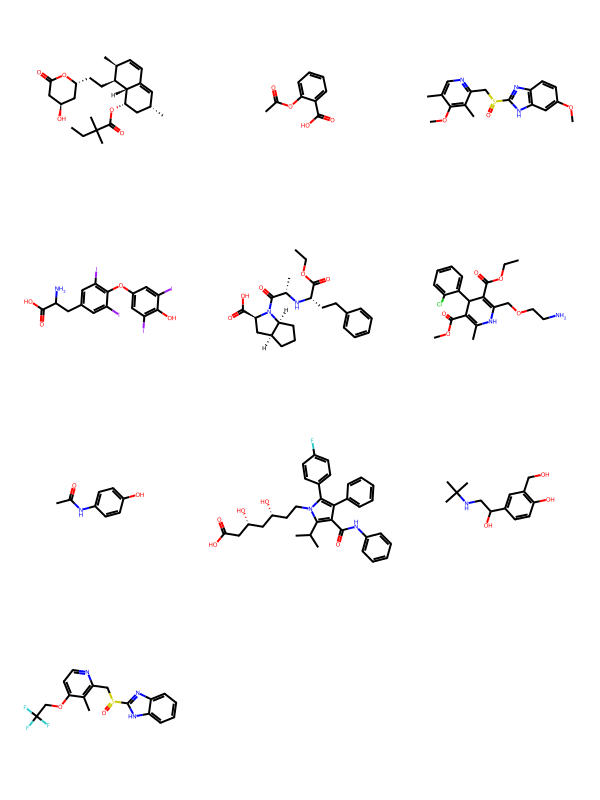

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

farmacos = ['O=C(O[C@@H]1[C@H]3C(=C/[C@H](C)C1)\C=C/[C@@H]([C@@H]3CC[C@H]2OC(=O)C[C@H](O)C2)C)C(C)(C)CC','O=C(C)Oc1ccccc1C(=O)O','CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC','NC(Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1)C(O)=O','O=C(OCC)[C@@H](N[C@H](C(=O)N1[C@H](C(=O)O)C[C@@H]2CCC[C@H]12)C)CCc3ccccc3',
           'Clc1ccccc1C2/C(C(=O)OC)=C(/C)N/C(COCCN)=C2/C(=O)OCC','CC(=O)Nc1ccc(O)cc1','O=C(O)C[C@H](O)C[C@H](O)CCn2c(c(c(c2c1ccc(F)cc1)c3ccccc3)C(=O)Nc4ccccc4)C(C)C','CC(C)(C)NCC(C1=CC(=C(C=C1)O)CO)O','FC(F)(F)COc1ccnc(c1C)CS(=O)c2[nH]c3ccccc3n2']
graficos = []

for i in farmacos:
  mol = Chem.MolFromSmiles(i)
  graficos.append(mol)
Draw.MolsToGridImage(graficos)


##Pregunta 5: Método científico



Los investigadores propusieron una hipótesis que consistía en utilizar cajas de huevos y pelotas de ping-pong como representación visual de los orbitales electrónicos, con el fin de facilitar la comprensión de la configuración electrónica y las propiedades periódicas de los elementos. Luego, diseñaron un experimento en el que tres grupos de estudiantes crearon sus propios modelos y diagramas, y fueron evaluados en función de su comprensión y capacidad para explicar los conceptos. Se analizaron y discutieron los resultados, llegando a la conclusión de que el uso de los modelos resultó efectivo para mejorar el aprendizaje de los estudiantes. Este proceso de formular una hipótesis, diseñar un experimento, recopilar datos, analizar resultados y llegar a conclusiones sigue los pasos del método científico.